In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ALL TEAMS IN IPL SO FAR

In [2]:
teams = pd.read_csv("teams.csv")

In [3]:
teams

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


# Overall Analysis

In [4]:
matches = pd.read_csv("matches.csv")

In [5]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
def same_team(data):
    if data=='Delhi Daredevils':
        data='Delhi Capitals'
    elif data=='Deccan Chargers':
        data='Sunrisers Hyderabad'
    elif data=='Pune Warriors' or data=='Rising Pune Supergiant':
        data='Rising Pune Supergiants'
    return data    

In [7]:
matches['team1']=matches['team1'].apply(lambda x:same_team(x))
matches['team2']=matches['team2'].apply(lambda x:same_team(x))
matches['toss_winner']=matches['toss_winner'].apply(lambda x:same_team(x))
matches['winner']=matches['winner'].apply(lambda x:same_team(x))

#### Most matches won by a team 

In [8]:
matches["winner"].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiants         27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

<AxesSubplot:>

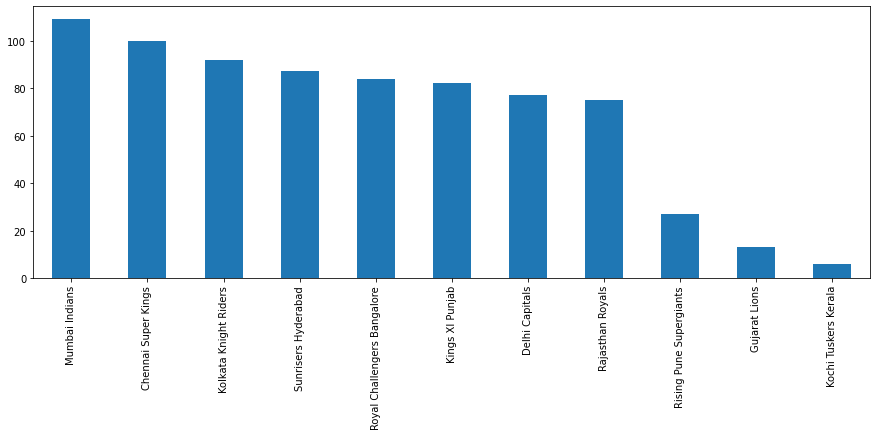

In [9]:
plt.figure(figsize=(15,5))
match_wins = matches.winner.value_counts()
matches.winner.value_counts().plot.bar()

### Toss wins

In [10]:
matches["toss_winner"].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Delhi Capitals                 90
Sunrisers Hyderabad            89
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Rising Pune Supergiants        33
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

<AxesSubplot:>

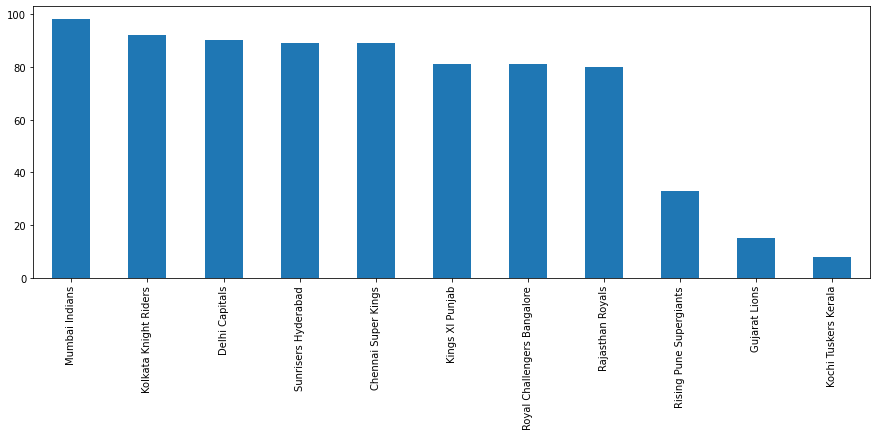

In [11]:
plt.figure(figsize=(15,5))
toss_wins = matches.toss_winner.value_counts()
matches.toss_winner.value_counts().plot.bar()

### Most wins after winning a toss

In [12]:
correct_decision = matches[matches['toss_winner']==matches['winner']]
correct_decision['winner'].value_counts()


Chennai Super Kings            57
Mumbai Indians                 56
Kolkata Knight Riders          53
Sunrisers Hyderabad            42
Delhi Capitals                 42
Rajasthan Royals               42
Royal Challengers Bangalore    41
Kings XI Punjab                35
Rising Pune Supergiants        11
Gujarat Lions                  10
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

<AxesSubplot:>

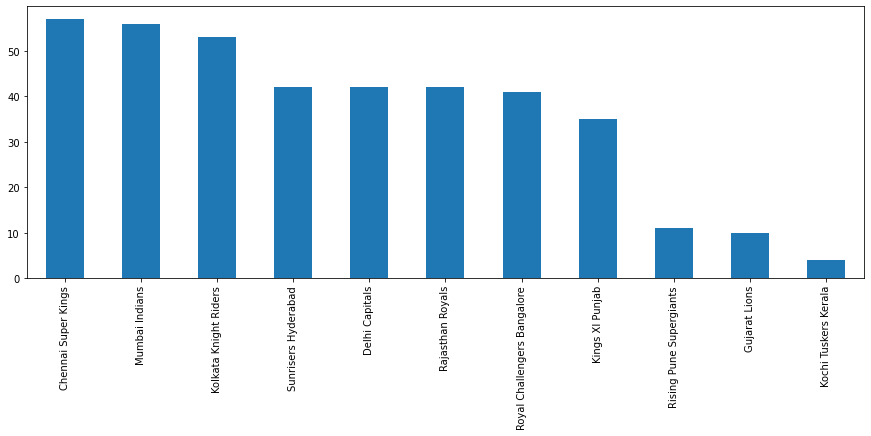

In [13]:
plt.figure(figsize=(15,5))
correct_decision = matches[matches['toss_winner']==matches['winner']]
correct_decision['winner'].value_counts()
correct_decision['winner'].value_counts().plot.bar()


### Type of Match results

In [14]:
matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

<AxesSubplot:>

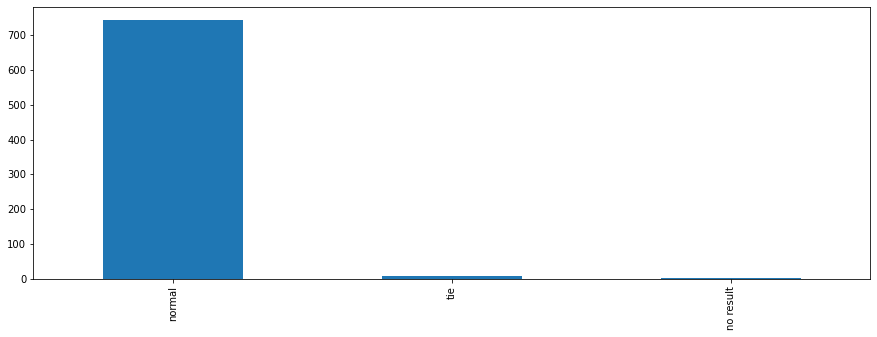

In [15]:
plt.figure(figsize=(15,5))
match_result = matches.result.value_counts()
match_result.plot.bar()

### Toss decision 

In [16]:
matches['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

<AxesSubplot:>

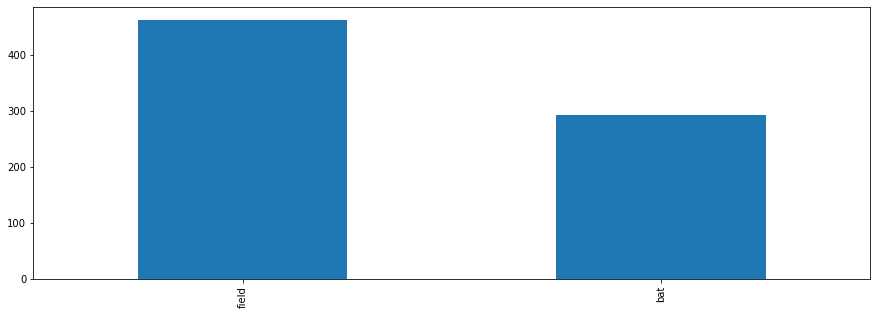

In [17]:
plt.figure(figsize=(15,5))
toss = matches.toss_decision.value_counts()
toss.head(15).plot.bar()

# Analysis of teams who batted first

In [18]:
battingFirst = matches[matches['win_by_runs']!=0]
battingFirst.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,IPL-2017,Pune,11-04-2017,Delhi Capitals,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,IPL-2017,Delhi,15-04-2017,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


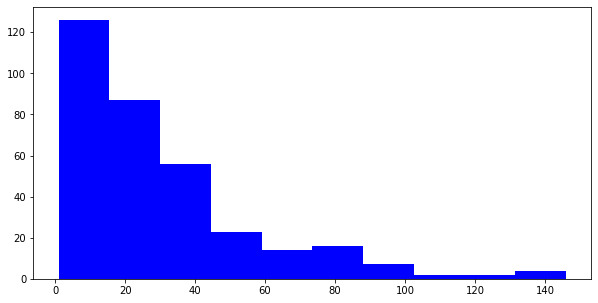

In [19]:
plt.figure(figsize=(10,5))
plt.hist(battingFirst['win_by_runs'], color='blue')
plt.show()

### Winner after Batting first

In [20]:
battingFirst['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Sunrisers Hyderabad            48
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Delhi Capitals                 28
Rajasthan Royals               27
Rising Pune Supergiants        13
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

### Pie chart 

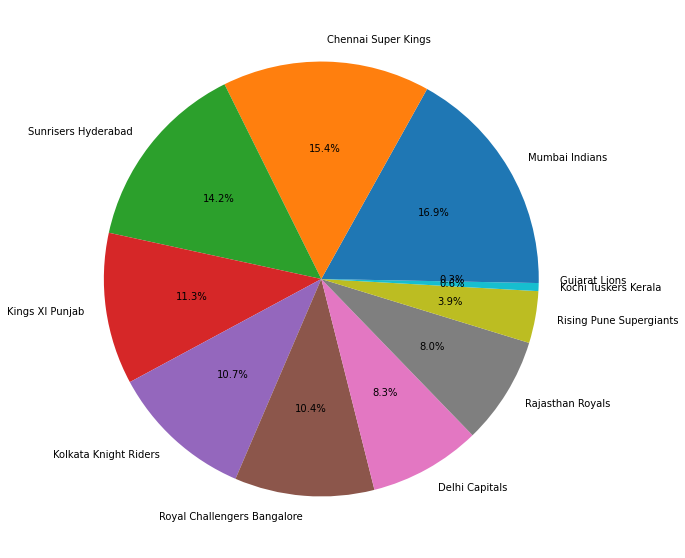

In [21]:
plt.figure(figsize=(10,10))
plt.pie(list(battingFirst['winner'].value_counts()),labels=list(battingFirst['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

# Analysis of Teams after Fielding first

In [22]:
fieldFirst = matches[matches['win_by_wickets']!=0]
fieldFirst.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


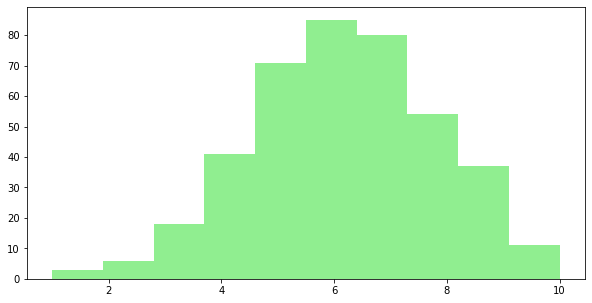

In [23]:
plt.figure(figsize=(10,5))
plt.hist(fieldFirst['win_by_wickets'], color='lightgreen')
plt.show()

### Most wins by chasing

In [24]:
fieldFirst['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Delhi Capitals                 48
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Sunrisers Hyderabad            38
Rising Pune Supergiants        14
Gujarat Lions                  12
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

### Pie chart

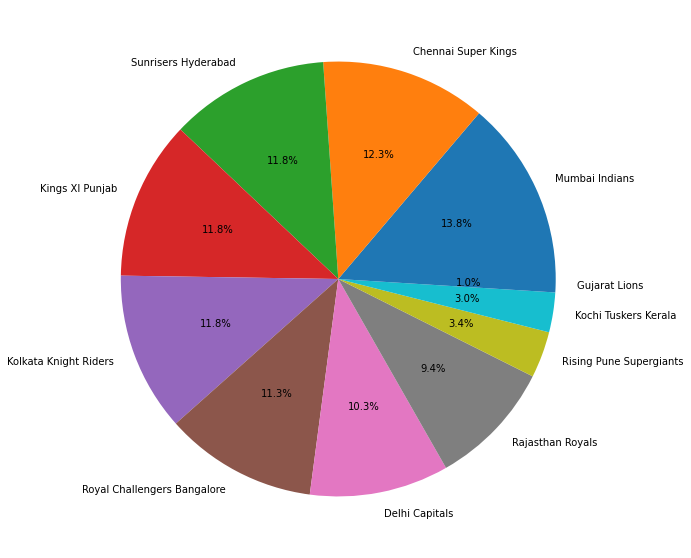

In [25]:
plt.figure(figsize=(10,10))
plt.pie(list(fieldFirst['winner'].value_counts()),labels=list(battingFirst['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

# Player Performance Analysis

In [26]:
mom = matches['player_of_match'].value_counts()

### Most Man of the Match Awards

In [27]:
mom.head(15)

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
MEK Hussey        12
AM Rahane         12
DR Smith          11
A Mishra          11
V Sehwag          11
Name: player_of_match, dtype: int64

<AxesSubplot:>

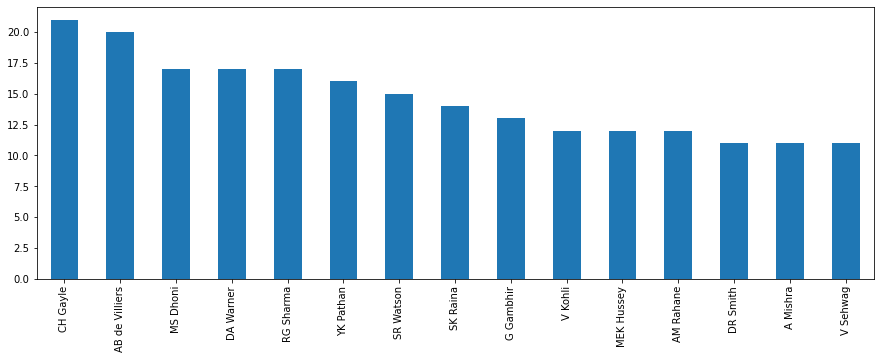

In [28]:
plt.figure(figsize=(15,5))
pom = matches.player_of_match.value_counts()
pom.head(15).plot.bar()

In [29]:
most_runs = pd.read_csv("most_runs_average_strikerate.csv")

### Most Runs

In [30]:
most_runs.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


<AxesSubplot:xlabel='batsman'>

<Figure size 1080x360 with 0 Axes>

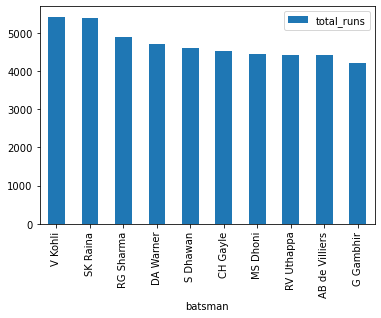

In [31]:
plt.figure(figsize=(15,5))
most_runs.sort_values('total_runs',ascending=False).head(10).plot.bar(x='batsman',y='total_runs')

## Stadiums and Venue

In [32]:
matches['venue'].value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

<AxesSubplot:>

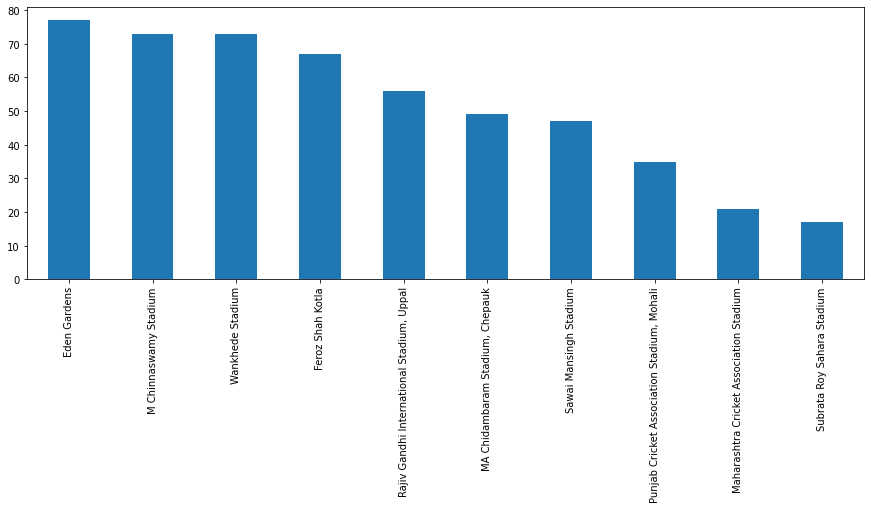

In [33]:
plt.figure(figsize=(15,5))
venue = matches.venue.value_counts()
venue.head(10).plot.bar()

In [34]:
matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Cuttack             7
Ranchi              7
Cape Town           7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

<AxesSubplot:>

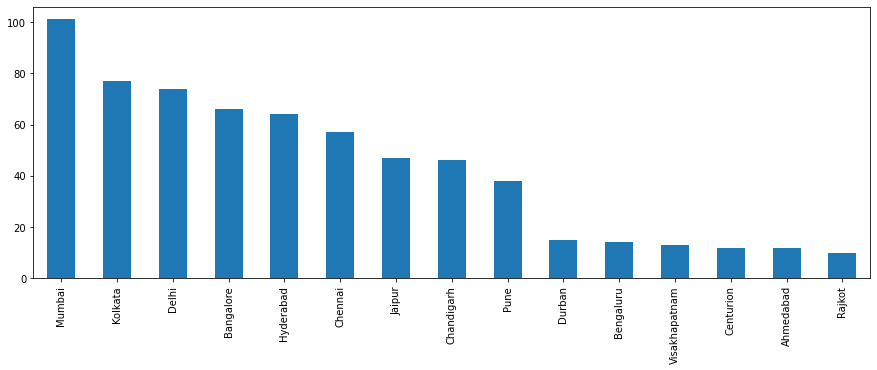

In [35]:
plt.figure(figsize=(15,5))
c = matches.city.value_counts()
c.head(15).plot.bar()

# IPL Season wise matches

In [36]:
s_m = matches['Season'].value_counts()

In [37]:
s_m

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2019    60
IPL-2010    60
IPL-2018    60
IPL-2014    60
IPL-2016    60
IPL-2015    59
IPL-2017    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

# Team wise data Analysis

In [38]:
team_wise = pd.read_csv('teamwise_home_and_away.csv')

In [39]:
team_wise

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


### Home Win percentage

<AxesSubplot:xlabel='team'>

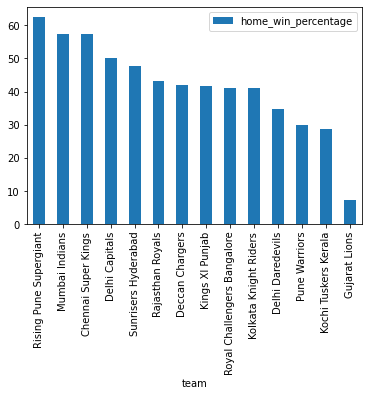

In [40]:
team_wise.sort_values('home_win_percentage',ascending=False).plot.bar(x='team',y='home_win_percentage')

### Away Win percentage

<AxesSubplot:xlabel='team'>

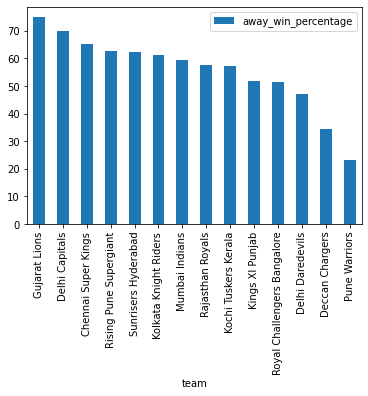

In [41]:
team_wise.sort_values('away_win_percentage',ascending=False).plot.bar(x='team',y='away_win_percentage')

### Home wins

<AxesSubplot:xlabel='team'>

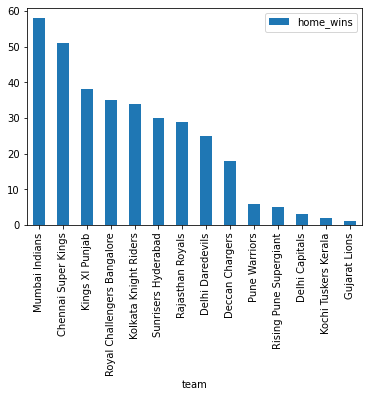

In [42]:
team_wise.sort_values('home_wins',ascending=False).plot.bar(x='team',y='home_wins')

### Away Wins

<AxesSubplot:xlabel='team'>

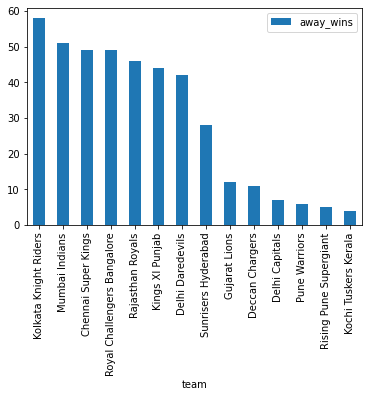

In [43]:
team_wise.sort_values('away_wins',ascending=False).plot.bar(x='team',y='away_wins')

In [44]:
total_matches = team_wise['home_matches'] + team_wise['away_matches']

In [45]:
team_wise['total_matches'] = total_matches

### Total Matches

<AxesSubplot:xlabel='team'>

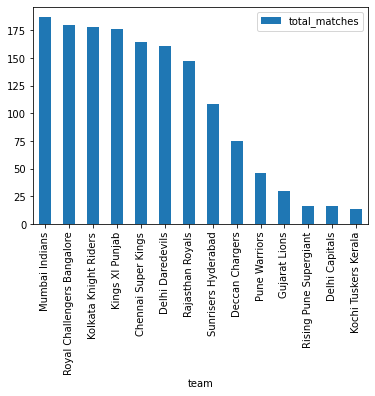

In [46]:
team_wise.sort_values('total_matches',ascending=False).plot.bar(x='team', y='total_matches')